In [16]:
import mglearn
import sklearn
import matplotlib.pyplot as plt
import numpy as np

/home/junghoseong/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/home/junghoseong/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/home/junghoseong/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


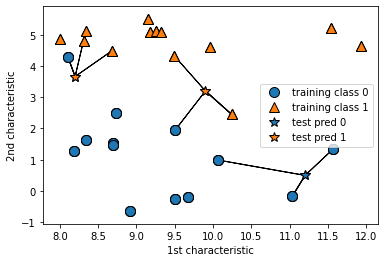

In [31]:
# 가. kNN 알고리즘을 이용한 분류 문제
%matplotlib inline
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(['class 0', 'class 1'], loc=4)
plt.xlabel("1st characteristic")
plt.ylabel("2nd characteristic")

mglearn.plots.plot_knn_classification(n_neighbors=1)
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [35]:
#kNN알고리즘을 이용하여 테스트 데이터 예측
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
clf.fit(X_train, y_train)
print(clf.predict(X_test))
print(y_test)
print(clf.score(X_test, y_test))

[1 0 1 0 1 0 0]
[1 0 1 0 1 1 0]
0.8571428571428571


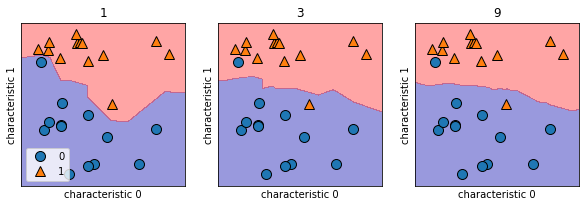

In [37]:
#Decision boundary 그려서 확인
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title(n_neighbors)
    ax.set_xlabel("characteristic 0")
    ax.set_ylabel("characteristic 1")
axes[0].legend(loc=3)

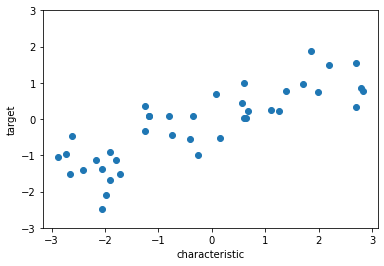

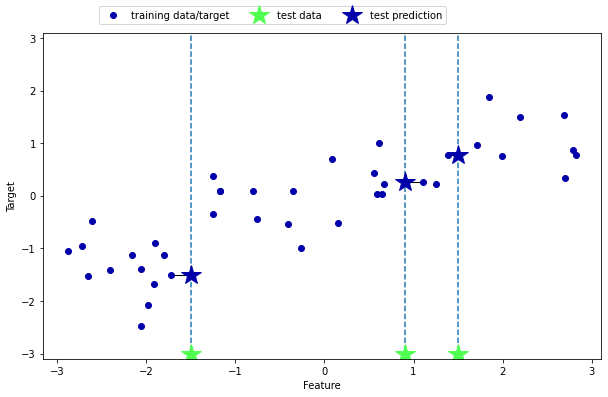

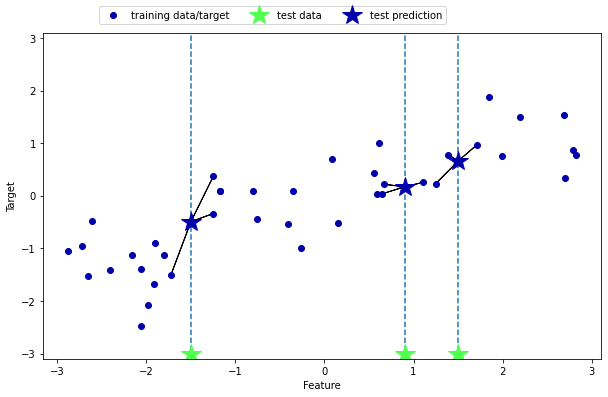

In [41]:
#kNN알고리즘을 이용한 회귀문제
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("characteristic")
plt.ylabel("target")
mglearn.plots.plot_knn_regression(n_neighbors=1)
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [43]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)
print(reg.predict(X_test))
print(y_test)
print(reg.score(X_test, y_test)) #결정 계수 값 확인 R^2

[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
[ 0.37299129  0.21778193  0.96695428 -1.38773632 -1.05979555 -0.90496988
  0.43655826  0.7789638  -0.54114599 -0.95652133]
0.8344172446249605


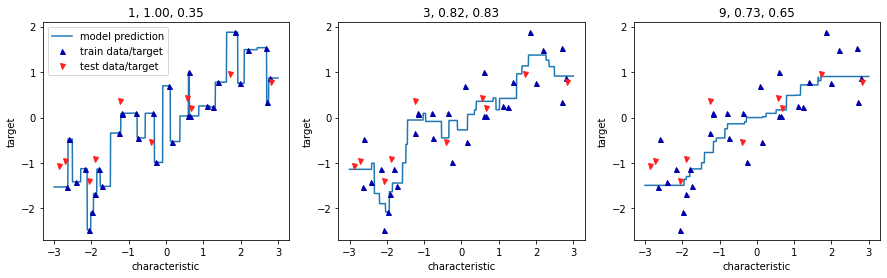

In [60]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=5)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=5)
    
    ax.set_title("{}, {:.2f}, {:.2f}".format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("characteristic")
    ax.set_ylabel("target")

axes[0].legend(["model prediction", "train data/target", "test data/target"], loc="best")
#neighbors가 늘어날수록 더 안정된 예측을 얻게 되는것을 확인할 수 있다. 

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
(569, 30)
(569,)
{'malignant': 212, 'benign': 357}
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


Text(0, 0.5, 'accuracy')

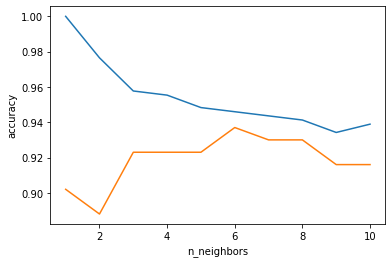

In [39]:
#kNN 알고리즘을 사용해서 k가 늘어날수록 일반화와의 관계 확인
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.keys())
print(cancer.data.shape)
print(cancer.target.shape)
print({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})
print(cancer.feature_names)

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy=[]
test_accuracy=[]
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy)
plt.plot(neighbors_settings, test_accuracy)
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")

In [26]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)
X, y = mglearn.datasets.load_extended_boston()
print(X.shape)

(506, 13)
(506, 104)


In [ ]:
#데이터 사이의 거리를 재는 방법과 이웃의 수가 가장 중요한 매개변수임 (보통 유클리디안 거리, 3~5개)
#이해하기 쉬운 모델이고 빠르게 만들 수 있지만, 훈련 세트가 매우 크면 예측이 느려진다.
#데이터를 전처리하는 과정이 중요하며, 많은 특성을 가진 데이터셋에 대해서는 작동하지 않고, sparse mtx에 대해서 잘 작동하지 않는다.